# Featuring

In [1]:
# warningの無視
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'Yu Mincho'

In [3]:
# 標準ライブラリ
import pickle
import datetime
from dateutil.relativedelta import relativedelta

# basic
import pandas as pd
import numpy as np

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Preprocessing
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# User defined functions
from self_lib import tips
from self_lib import doggie_tail as d_

# Jupyter上で図を表示するためのコマンド
%matplotlib inline

In [4]:
# 表示列数を指定
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### version setting

In [5]:
mode="pre"  #"pre / test"

In [6]:
if mode=="pre":
    filepath="../data/feature/pre_"
elif mode=="test":
    filepath="../data/feature/test_"
else:
    print("miss spelling")

### Input

In [7]:
# data定義
with open('../_regulation/data_def.pickle','rb') as f:
    d_def = pickle.load(f)

In [8]:
# data読込み
if mode=="pre":
    # data
    raw_data=pd.read_pickle("../data/pre/pre_data.pickle")
elif mode=="test":
    # test_data
    raw_data=pd.read_pickle("../data/pre/pre_test_data.pickle")
else:
    print("miss spelling")

In [9]:
data = raw_data.copy()

In [10]:
data.shape

(255477, 30)

In [11]:
# データ列の定義を表示する
d_def

ID                                                               融資番号
Borrower                                債務法人の名前（特定を避けるため関連のない文字列に変換済）
City                                                     債務法人の所在地（都市）
State                                                     債務法人の所在地（州）
Zip                                                    債務法人の所在地（郵便番号）
Bank                                      融資銀行名（特定を避けるため関連のない文字列に変換済）
BankState                                                 融資銀行の所在地（州）
SystemCode                                                産業分類システムコード
ApprovalDate                                               支援機関による承認日
ApprovalFY                                                支援機関による承認年度
Term                                                          融資期間（月）
Employees                                                  債務法人による雇用数
ExistNew                                          1 = 既存の事業, 2 = 新規事業
CreateJob                                                    創出された職種数
RetainedJob         

In [12]:
d_.d(data)

,Borrower,City,State,Zip,Bank,BankState,SystemCode,ApprovalDate,ApprovalFY,Term,Employees,ExistNew,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowLoan,DisbursementDate,DisbursementGross,BalanceGross,LoanAmount,GuaranteedLoan,LoanStatus,Approval_Y,Approval_M,Approval_D,DisbursementDate_Y,DisbursementDate_M,DisbursementDate_D
count,255477,255471,255473,255477,255049,255048,255477,255477,255477,255477.00,255477.00,255431.00,255477.00,255477.00,255477.00,255477.00,254117,254729,255477,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00
missing,0,6,4,0,428,429,0,0,0,0.00,0.00,46.00,0.00,0.00,0.00,0.00,1360,748,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
missing_per,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
unique,255477,20085,51,24373,4598,54,1264,8646,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,7,5587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ibbssqkersjkaxi,LOS ANGELES,CA,10001,kcjyktbecc,CA,0,1993-07-07 00:00:00,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1995-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3441,37942,278,26362,33690,56781,311,19749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120274,221768,3020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.43,11.17,1.28,8.56,10.85,1695.70,0.76,NaN,NaN,NaN,197988.37,0.71,189347.82,146924.24,0.19,2000.97,6.48,16.15,2001.26,6.35,27.59
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.48,75.02,0.45,239.67,239.85,10129.08,0.64,NaN,NaN,NaN,285129.76,206.61,282409.05,227516.87,0.39,5.98,3.37,8.76,5.90,3.43,7.44
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,4000.00,0.00,1000.00,500.00,0.00,1971.00,1.00,1.00,1971.00,1.00,1.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.00,2.00,1.00,0.00,0.00,1.00,0.00,NaN,NaN,NaN,40000.00,0.00,35000.00,20000.00,0.00,1996.00,4.00,9.00,1997.00,4.00,30.00


In [13]:
data.head()

,Borrower,City,State,Zip,Bank,BankState,SystemCode,ApprovalDate,ApprovalFY,Term,Employees,ExistNew,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowLoan,DisbursementDate,DisbursementGross,BalanceGross,LoanAmount,GuaranteedLoan,LoanStatus,Approval_Y,Approval_M,Approval_D,DisbursementDate_Y,DisbursementDate_M,DisbursementDate_D
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9568103009,aaaavgcebciyrso,LONGVIEW,TX,75601,jhcuxowaay,IL,621320,1996-09-23,1996,84,6,1.00,0,0,1,0,0,N,1996-12-31,100000,0,100000,50000,0,1996,9,23,1996,12,31
7208134000,aaaavxsbhbgwzum,COEUR D'ALENE,ID,83814,neifwowons,ID,541511,2004-02-24,2004,26,1,1.00,0,1,1,1,Y,N,2004-03-31,47719,0,35000,17500,0,2004,2,24,2004,3,31
8283143001,aaabwzkeytthskq,SEELEY LAKE,MT,59868,jwwxcwcjos,MT,0,1995-04-21,1995,180,2,1.00,0,0,1,0,N,N,1995-07-31,110000,0,110000,82500,0,1995,4,21,1995,7,31
7653414010,aaadbmusvfrhphi,MILFORD (CENSUS NAME FOR MILFO,NH,3055,ajkgixblfd,RI,561622,2004-07-29,2004,84,6,1.00,1,7,1,1,0,N,2004-08-31,55000,0,100000,50000,0,2004,7,29,2004,8,31
9066434010,aaadmbsqmlwccxz,COLUMBIA,MS,39429,mvyccmuael,LA,484110,2005-08-25,2005,60,1,1.00,1,0,1,2,0,N,2005-11-30,50000,0,50000,25000,0,2005,8,25,2005,11,30


In [14]:
# 目的変数yを取得する
if mode=='pre':
    data_y=data['LoanStatus']
    data_y.to_pickle(filepath + 'feature_data_y.pickle')
elif mode=='test':
    pass

In [15]:
data['RevLineCr'].value_counts(dropna=False)

N      120274
0       70343
Y       59063
T        4418
NaN      1360
1           9
`           5
R           3
3           1
7           1
Name: RevLineCr, dtype: int64

In [16]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1a_data=data['RevLineCr'].copy()
# ax1a_data=ax1a_data.fillna('NaN')
# ax1a_data=ax1a_data.value_counts()

# ax1b_data=data['RevLineCr'].loc[data['LoanStatus']==1].copy()
# ax1b_data=ax1b_data.fillna('NaN')
# ax1b_data=ax1b_data.value_counts()

# ax1 = plt.subplot(111)   
# ax1 = ax1a_data.plot.bar(rot=0,color='b')

# ax2 = plt.subplot(111)   
# ax2 = ax1b_data.plot.bar(rot=0,color='r')

# ax1.set_xlabel('RevLineCr')
# ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend('All','Default')

# # 表示
# plt.show()

In [17]:
# カウントが少ない値を欠損値に置換
data['RevLineCr'][data['RevLineCr'].isna()]=0
data['RevLineCr'][~data['RevLineCr'].isin(['Y','N'])]=0
data['RevLineCr'][data['RevLineCr'].isin(['N'])]=1
data['RevLineCr'][data['RevLineCr'].isin(['Y'])]=2
data['RevLineCr']=data['RevLineCr'].astype('int32')

In [18]:
data['RevLineCr'].value_counts(dropna=False)

1    120274
0     76140
2     59063
Name: RevLineCr, dtype: int64

In [19]:
data['LowLoan'].value_counts(dropna=False)

N      221768
Y       31989
NaN       748
0         435
C         201
S         172
A         142
R          22
Name: LowLoan, dtype: int64

In [20]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1a_data=data['LowLoan'].copy()
# ax1a_data=ax1a_data.fillna('NaN')
# ax1a_data=ax1a_data.value_counts()

# ax1b_data=data['LowLoan'].loc[data['LoanStatus']==1].copy()
# ax1b_data=ax1b_data.fillna('NaN')
# ax1b_data=ax1b_data.value_counts()

# ax1 = plt.subplot(111)   
# ax1 = ax1a_data.plot.bar(rot=0,color='b')

# ax2 = plt.subplot(111)   
# ax2 = ax1b_data.plot.bar(rot=0,color='r')

# ax1.set_xlabel('LowLoan')
# ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend('All','Default')

# # 表示
# plt.show()

In [21]:
# カウントが少ない値を欠損値に置換
data['LowLoan'][data['LowLoan'].isna()]=0
data['LowLoan'][~data['LowLoan'].isin(['N','Y'])]=0
data['LowLoan'][data['LowLoan'].isin(['N'])]=1
data['LowLoan'][data['LowLoan'].isin(['Y'])]=2
data['LowLoan']=data['LowLoan'].astype('int32')

In [22]:
data['LowLoan'].value_counts(dropna=False)

1    221768
2     31989
0      1720
Name: LowLoan, dtype: int64

In [23]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1a_data=data['LowLoan'].copy()
# ax1a_data=ax1a_data.fillna('NaN')
# ax1a_data=ax1a_data.value_counts()

# ax1b_data=data['LowLoan'].loc[data['LoanStatus']==1].copy()
# ax1b_data=ax1b_data.fillna('NaN')
# ax1b_data=ax1b_data.value_counts()

# ax1 = plt.subplot(111)   
# ax1 = ax1a_data.plot.bar(rot=0,color='b')

# ax2 = plt.subplot(111)   
# ax2 = ax1b_data.plot.bar(rot=0,color='r')

# ax1.set_xlabel('LowLoan')
# ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend('All','Default')

# # 表示
# plt.show()

In [24]:
data['FranchiseCode'].value_counts(dropna=False)

1        183586
0         62749
78760       558
21780       222
68020       221
          ...  
23110         1
87344         1
25366         1
64850         1
70755         1
Name: FranchiseCode, Length: 1685, dtype: int64

In [25]:
# フランチャイズかどうかのカテゴリーに変換
data['FranchiseCode'][data['FranchiseCode'].isin([1,0])]=0
data['FranchiseCode'][~data['FranchiseCode'].isin([0])]=1

In [26]:
data['FranchiseCode'].value_counts(dropna=False)

0    246335
1      9142
Name: FranchiseCode, dtype: int64

In [27]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1a_data=data['FranchiseCode'].copy()
# ax1a_data=ax1a_data.fillna('NaN')
# ax1a_data=ax1a_data.value_counts()

# ax1b_data=data['FranchiseCode'].loc[data['LoanStatus']==1].copy()
# ax1b_data=ax1b_data.fillna('NaN')
# ax1b_data=ax1b_data.value_counts()

# ax1 = plt.subplot(111)   
# ax1 = ax1a_data.plot.bar(rot=0,color='b')

# ax2 = plt.subplot(111)   
# ax2 = ax1b_data.plot.bar(rot=0,color='r')

# ax1.set_xlabel('FranchiseCode')
# ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend('All','Default')

# # 表示
# plt.show()

In [28]:
data['CreateJob'].value_counts(dropna=False)

0      178554
1       18683
2       16777
3        8250
4        5877
        ...  
220         1
93          1
152         1
96          1
127         1
Name: CreateJob, Length: 167, dtype: int64

In [29]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(data['CreateJob'].value_counts(),bins=50)

# ax1 = plt.subplot(111)   
# ax1.hist(data['CreateJob'].loc[data['LoanStatus']==1].value_counts(),bins=50)

# # plt.axvline(x=3000, ymin=0, ymax=1,color="r")

# ax1.set_xlabel('CreateJob')
# ax1.set_ylabel('counts')

# # # 凡例の表示
# # plt.legend()

# # 表示
# plt.show()

In [30]:
# CreateJobかどうかのカテゴリーに変換
data['CreateJob'][data['CreateJob']>0]=1
data['CreateJob'][~data['CreateJob']>0]=0

In [31]:
# data['CreateJob_4000']=0
# data['CreateJob_4000'][data['CreateJob']<4000]=1
# data['CreateJob_4000'][data['CreateJob']>=4000]=0

In [32]:
# data['CreateJob']=data.drop('CreateJob',axis=1)

In [33]:
data['RetainedJob'].value_counts(dropna=False)

0       123873
1        26108
2        22325
3        14682
4        11540
         ...  
602          1
428          1
216          1
940          1
3100         1
Name: RetainedJob, Length: 237, dtype: int64

In [34]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(data['RetainedJob'].value_counts(),bins=30)

# ax1 = plt.subplot(111)   
# ax1.hist(data['RetainedJob'].loc[data['LoanStatus']==1].value_counts(),bins=30)

# ax1.set_xlabel('RetainedJob')
# ax1.set_ylabel('counts')

# # # 凡例の表示
# # plt.legend()

# # 表示
# plt.show()

In [35]:
# RetainedJobかどうかのカテゴリーに変換
data['RetainedJob'][data['RetainedJob']>0]=1
data['RetainedJob'][~data['RetainedJob']>0]=0

In [36]:
data['RetainedJob'].value_counts(dropna=False)

1    131604
0    123873
Name: RetainedJob, dtype: int64

In [37]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1a_data=data['RetainedJob'].copy()
# ax1a_data=ax1a_data.fillna('NaN')
# ax1a_data=ax1a_data.value_counts()

# ax1b_data=data['RetainedJob'].loc[data['LoanStatus']==1].copy()
# ax1b_data=ax1b_data.fillna('NaN')
# ax1b_data=ax1b_data.value_counts()

# ax1 = plt.subplot(111)   
# ax1 = ax1a_data.plot.bar(rot=0,color='b')

# ax2 = plt.subplot(111)   
# ax2 = ax1b_data.plot.bar(rot=0,color='r')

# ax1.set_xlabel('RetainedJob')
# ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend('All','Default')

# # 表示
# plt.show()

In [38]:
data['ExistNew'].value_counts(dropna=False)

1.00    184289
2.00     70845
0.00       297
NaN         46
Name: ExistNew, dtype: int64

In [39]:
# ExistNewかどうかのカテゴリーに変換
data['ExistNew_c']=data['ExistNew'].copy()
data['ExistNew_c'][data['ExistNew'].isna()]=0
data['ExistNew_c']=data['ExistNew_c'].astype(int)

In [40]:
data['ExistNew_c'].value_counts(dropna=False)

1    184289
2     70845
0       343
Name: ExistNew_c, dtype: int64

In [41]:
data['Employees'].head()

ID
9568103009    6
7208134000    1
8283143001    2
7653414010    6
9066434010    1
Name: Employees, dtype: int64

In [42]:
data['Employees'].isna().sum()

0

In [43]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(data['Employees'].loc[data['Employees']<100],bins=100)

# ax1 = plt.subplot(111)   
# ax1.hist(data['Employees'].loc[data['Employees']<100].loc[data['LoanStatus']==1],bins=100)

# ax1.set_xlabel('Employees')
# ax1.set_ylabel('counts')

# # # 凡例の表示
# # plt.legend()

# # 表示
# plt.show()

In [44]:
data['Term'].head()

ID
9568103009     84
7208134000     26
8283143001    180
7653414010     84
9066434010     60
Name: Term, dtype: int64

In [45]:
data['Term'].isna().sum()

0

In [46]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(data['Term'],bins=100)

# ax1 = plt.subplot(111)   
# ax1.hist(data['Term'].loc[data['LoanStatus']==1],bins=100)

# ax1.set_xlabel('Term')
# ax1.set_ylabel('counts')

# # # 凡例の表示
# # plt.legend()

# # 表示
# plt.show()

In [47]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(data['Term'].loc[data['Term']<100],bins=100)

# ax1 = plt.subplot(111)   
# ax1.hist(data['Term'].loc[data['Term']<100].loc[data['LoanStatus']==1],bins=50)

# plt.axvline(x=12, ymin=0, ymax=1,color="r")
# plt.axvline(x=36, ymin=0, ymax=1,color="r")
# plt.axvline(x=36, ymin=0, ymax=1,color="r")
# plt.axvline(x=48, ymin=0, ymax=1,color="r")
# plt.axvline(x=60, ymin=0, ymax=1,color="r")
# plt.axvline(x=72, ymin=0, ymax=1,color="r")
# plt.axvline(x=84, ymin=0, ymax=1,color="r")

# ax1.set_xlabel('Term')
# ax1.set_ylabel('counts')

# # # 凡例の表示
# # plt.legend()

# # 表示
# plt.show()

In [48]:
data['Term_U84']=data['Term'].apply(lambda x: 1 if x<=84 else 0)

In [49]:
# 期間が12/6/3か月で割り切れる、キリのいい月数かフラグをたてる
def flg(month,cnt):
    if month<=100:
        if month % cnt ==0:
            return 1
        else:
            return 0
    else:
        return 0
data["Term_12"]= data['Term'].apply(lambda x: flg(x,12))
data["Term_6"]= data['Term'].apply(lambda x: flg(x,6))
data["Term_3"]= data['Term'].apply(lambda x: flg(x,3))

In [50]:
a_data=data.copy()
from dateutil.relativedelta import relativedelta

# 貸金期日
def addMonth(month):
    return relativedelta(years=month//12,months=month%12)
addMonth(85)

relativedelta(years=+7, months=+1)

In [51]:
# a_data[['ApprovalDate','Approval_M']].apply(lambda x: x['ApprovalDate'] + relativedelta(month=+x['Approval_M']),axis=1)
data['EndDate']=data[['ApprovalDate','Term']].apply(lambda x: x['ApprovalDate'] + addMonth(x['Term']),axis=1)

In [52]:
data=data.drop('EndDate',axis=1)

In [53]:
# data.columns

In [54]:
# print(data['ApprovalDate'])
# print(data['Approval_M'])

In [55]:
# d_.d(a_data)

In [56]:
# data['SystemCode'].head()

In [57]:
# システムコードの出現回数のカウント　-> 特定のシステムコードは出現しやすいが、それ以外はほとんど出現しない
df_sysCnt=pd.DataFrame(data['SystemCode'].value_counts(ascending=False)).T
df_sysCnt

,0,722110,722211,621210,811111,624410,812112,561730,621310,541110,621111,812320,445310,447110,811121,484110,453220,713940,451110,453998,541330,541940,238990,445110,721110,811192,722410,236118,238220,812990,236115,524210,235110,541511,541512,531210,238210,484121,453110,445120,541611,812310,561720,444130,722213,448310,235310,441120,448120,442110,...,315221,926110,331411,111339,221114,339910,482112,486110,327410,926120,333249,522130,922190,921110,522294,712120,332216,331423,213115,443141,333412,315992,624221,312221,514110,335222,813219,111411,334415,322226,926140,212313,336419,325312,325222,312210,111910,111336,111331,315990,335228,339912,336414,212324,488320,922140,315280,524192,311223,333413
SystemCode,56781,7680,4525,4291,4188,2939,2625,2582,2511,2214,2045,1992,1987,1963,1730,1722,1716,1708,1687,1646,1596,1595,1579,1539,1487,1426,1401,1361,1269,1265,1238,1232,1222,1201,1153,1147,1139,1063,1053,1050,1047,1040,1031,1005,980,976,974,969,961,881,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [58]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(df_sysCnt.value_counts(),bins=10)

# ax1.set_xlabel('df_sysCnt')
# ax1.set_ylabel('counts')

# # # 凡例の表示
# # plt.legend()

# # 表示
# plt.show()

In [59]:
data['SystemCode'].isna().sum()

0

In [60]:
data['SystemCode']=data['SystemCode'].astype(int)

In [61]:
# 産業分類コードがあるかないかのフラグ
data['SystemCode'].loc[data['SystemCode']>0]=1
data['SystemCode'].loc[data['SystemCode']==0]=0

In [62]:
# data['SystemCode'].value_counts()

In [63]:
# data['SystemCode']=data['SystemCode'].astype(str)

In [64]:
# data['Sys_A'],data['Sys_B'],data['Sys_C'],data['Sys_D'],data['Sys_E'],data['Sys_F']=data['SystemCode'].str[0],data['SystemCode'].str[1],data['SystemCode'].str[2],data['SystemCode'].str[3],data['SystemCode'].str[4],data['SystemCode'].str[5]

In [65]:
# Borrower/Bankは削除する
data=data.drop(['Borrower','Bank'],axis=1)

In [66]:
# 住所コードを５桁に補完する
def addZip0(Zip):
    if len(Zip)<=5:
        cnt0=5-len(Zip)
        return "0"*cnt0 + Zip
    else:
        pass

data['Zip']=data['Zip'].apply(lambda x : addZip0(x)).astype(str)
data['zip_A'],data['zip_B'],data['zip_C'],data['zip_D'],data['zip_E']=data['Zip'].str[0],data['Zip'].str[1],data['Zip'].str[2],data['Zip'].str[3],data['Zip'].str[4]

In [67]:
# data['Zip'].nunique()

In [68]:
# CityはZipと同一内容のため削除する
data=data.drop(['City'],axis=1)

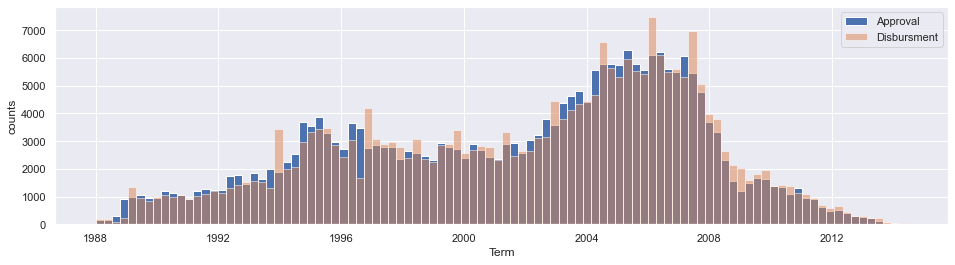

In [69]:
# Figureの初期化
fig = plt.figure(figsize=(16, 4))

ax1 = plt.subplot(111)   
ax1.hist(data['ApprovalDate'][data['ApprovalDate']<"2020-01-01"]["1988-01-01"<data['ApprovalDate']],bins=100)

ax2 = plt.subplot(111)   
ax2.hist(data['DisbursementDate'][data['DisbursementDate']<"2020-01-01"]["1988-01-01"<data['DisbursementDate']],bins=100,alpha=0.5)

ax1.set_xlabel('Term')
ax1.set_ylabel('counts')

# 凡例の表示
plt.legend(["Approval","Disbursment"])

# 表示
plt.show()

In [70]:
# 返済間隔
data['Dis_App_Month']=data['DisbursementDate'].dt.month-data['ApprovalDate'].dt.month
data['Dis_App_Month'][data['Dis_App_Month']<0]=0.0
data['Dis_App_Month']=data['Dis_App_Month'].astype('int32')

In [71]:
data['Dis_App_Month']

ID
9568103009    3
7208134000    1
8283143001    3
7653414010    1
9066434010    3
             ..
3045015002    0
4358364001    3
8787214009    0
7602753000    1
4561515000    1
Name: Dis_App_Month, Length: 255477, dtype: int32

In [72]:
# 返済回数
data['ReturnCnt']=0
data['ReturnCnt']=data['Term']//data['Dis_App_Month']
data['ReturnCnt'][data['Dis_App_Month']==0]=0
data['ReturnCnt'][data['Dis_App_Month']==np.inf]=0
data['ReturnCnt'][data['Dis_App_Month']==-np.inf]=0
data['ReturnCnt']=data['ReturnCnt'].astype(int)

In [73]:
# 実際の貸金総額
data['ActualGross']=data['DisbursementGross']+data['BalanceGross']

In [74]:
# 1月当たりの返済金額
data['ReturnAmountPerMonth']=0
data['ReturnAmountPerMonth']=data['LoanAmount']//data['Term']
data['ReturnAmountPerMonth'][data['Term']==0]=0
data['ReturnAmountPerMonth'][data['ReturnAmountPerMonth']==np.inf]=data['ReturnAmountPerMonth'].mean()
data['ReturnAmountPerMonth']=data['ReturnAmountPerMonth'].astype(int)
data['ReturnAmountPerMonth']

ID
9568103009    1190
7208134000    1346
8283143001     611
7653414010    1190
9066434010     833
              ... 
3045015002     306
4358364001     754
8787214009      59
7602753000     811
4561515000    1125
Name: ReturnAmountPerMonth, Length: 255477, dtype: int32

In [75]:
# 1回あたりの返済金額
data['ReturnAmountPerCnt']=0
data['ReturnAmountPerCnt']=data['LoanAmount']//data['ReturnCnt']
data['ReturnAmountPerCnt'][data['ReturnCnt']==0]=0
data['ReturnAmountPerCnt'][data['ReturnAmountPerCnt']==np.inf]=data['ActualGross']
data['ReturnAmountPerCnt'][data['ReturnAmountPerCnt']==-np.inf]=data['ActualGross']
data['ReturnAmountPerCnt']=data['ReturnAmountPerCnt'].astype(int)

In [76]:
# 実際の貸金金額と第三者保証の比率
data['GuaranteedAmountRatio']=data['GuaranteedLoan']//data['ActualGross']

In [77]:
# 実際の貸金金額と金融機関承認額の比率
data['ProperAmountRatio']=(data['LoanAmount']//data['ActualGross'])

In [78]:
# 金融機関承認額と第三者保証の差額
data['dif_Bank-Grt']=data['LoanAmount']-data['GuaranteedLoan']

In [79]:
# a_rate
data['a_rate']=np.round((data['DisbursementGross']-data['ReturnAmountPerMonth']*data['Dis_App_Month'])/data['LoanAmount']*100,decimals=2)

In [80]:
# b_rate
data['b_rate']=np.round(data['dif_Bank-Grt']/data['LoanAmount'],decimals=2)

In [81]:
# c_amount
data['c_amount']=np.round(data['ReturnAmountPerCnt']*(1+data['a_rate']/10000000),decimals=2)

In [82]:
# data['a_rate']

In [83]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(data['a_rate'].loc[data['a_rate']<10.5].loc[8<data['a_rate']],bins=80)

# ax2 = plt.subplot(111)   
# ax2.hist(data['a_rate'].loc[data['LoanStatus']==1].loc[data['a_rate']<10.5].loc[8<data['a_rate']],bins=80,alpha=0.5)

# ax1.set_xlabel('Term')
# ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend(["Approval","Disbursment"])

# # 表示
# plt.show()

In [84]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(data['LoanAmount'].loc[data['LoanAmount']<1000000],bins=100)

# ax2 = plt.subplot(111)   
# ax2.hist(data['ActualGross'].loc[data['ActualGross']<1000000],bins=100,alpha=0.5)

# ax3 = plt.subplot(111)   
# ax3.hist(data['GuaranteedLoan'].loc[data['GuaranteedLoan']<1000000],bins=100,alpha=0.5)

# ax1.set_xlabel('LoanAmount')
# ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend(["金融機関承認額","支払+未払い金額","第三者保証"])

# # 表示
# plt.show()

In [85]:
data.shape

(255477, 48)

In [86]:
# 不要な行を削除
data=data.drop(['ApprovalDate','DisbursementDate','ApprovalFY'],axis=1)

In [87]:
data.shape

(255477, 45)

In [88]:
# カテゴリ変数リスト
l_cat=['zip_A','zip_B','zip_C','zip_D','zip_E','SystemCode','RevLineCr','LowLoan','ExistNew','CreateJob','RetainedJob','FranchiseCode','UrbanRural']

In [89]:
# 不要な列を削除
data=data.drop(['State','Zip','BankState'],axis=1)

In [90]:
data.shape

(255477, 42)

In [91]:
# カテゴリー変数化
data[l_cat]=data[l_cat].astype('category')

In [92]:
d_.d(data)

,SystemCode,Term,Employees,ExistNew,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowLoan,DisbursementGross,BalanceGross,LoanAmount,GuaranteedLoan,LoanStatus,Approval_Y,Approval_M,Approval_D,DisbursementDate_Y,DisbursementDate_M,DisbursementDate_D,ExistNew_c,Term_U84,Term_12,Term_6,Term_3,zip_A,zip_B,zip_C,zip_D,zip_E,Dis_App_Month,ReturnCnt,ActualGross,ReturnAmountPerMonth,ReturnAmountPerCnt,GuaranteedAmountRatio,ProperAmountRatio,dif_Bank-Grt,a_rate,b_rate,c_amount
count,255477.0,255477.00,255477.00,255431.0,255477.0,255477.0,255477.0,255477.0,255477.0,255477.0,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477,255477,255477,255477,255477,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00
missing,0.0,0.00,0.00,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
missing_per,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
unique,2.0,NaN,NaN,3.0,2.0,2.0,2.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,10,10,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1.0,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,198696.0,NaN,NaN,184289.0,178554.0,131604.0,246335.0,134448.0,120274.0,221768.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49657,35299,54298,61317,37912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,111.43,11.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197988.37,0.71,189347.82,146924.24,0.19,2000.97,6.48,16.15,2001.26,6.35,27.59,1.28,0.62,0.44,0.47,0.51,NaN,NaN,NaN,NaN,NaN,1.26,38.39,197989.08,2395.96,3029.54,0.10,0.83,42423.57,117.09,0.29,3029.57
std,NaN,79.48,75.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285129.76,206.61,282409.05,227516.87,0.39,5.98,3.37,8.76,5.90,3.43,7.44,0.45,0.48,0.50,0.50,0.50,NaN,NaN,NaN,NaN,NaN,1.70,57.12,285129.52,9766.87,19045.64,0.37,0.49,79111.62,62.37,0.18,19045.70
min,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.00,0.00,1000.00,500.00,0.00,1971.00,1.00,1.00,1971.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,4000.00,0.00,0.00,0.00,0.00,0.00,-650.01,0.00,0.00
25%,NaN,60.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000.00,0.00,35000.00,20000.00,0.00,1996.00,4.00,9.00,1997.00,4.00,30.00,1.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,40000.00,476.00,0.00,0.00,1.00,7300.00,98.04,0.15,0.00


In [93]:
data.shape

(255477, 42)

In [94]:
# ダミー変数化
df_dummy=pd.get_dummies(data[l_cat], dummy_na=True,prefix=l_cat,prefix_sep='_',drop_first=True)

In [95]:
# ダミー化済列削除
data=data.drop(l_cat,axis=1)

In [96]:
data.shape

(255477, 29)

In [97]:
# データの連結
data=pd.merge(data, df_dummy, right_index=True, left_index=True)

In [98]:
# df_dummy.shape

In [99]:
data.shape

(255477, 99)

In [100]:
d_.d(data)

,Term,Employees,DisbursementGross,BalanceGross,LoanAmount,GuaranteedLoan,LoanStatus,Approval_Y,Approval_M,Approval_D,DisbursementDate_Y,DisbursementDate_M,DisbursementDate_D,ExistNew_c,Term_U84,Term_12,Term_6,Term_3,Dis_App_Month,ReturnCnt,ActualGross,ReturnAmountPerMonth,ReturnAmountPerCnt,GuaranteedAmountRatio,ProperAmountRatio,dif_Bank-Grt,a_rate,b_rate,c_amount,zip_A_1,zip_A_2,zip_A_3,zip_A_4,zip_A_5,zip_A_6,zip_A_7,zip_A_8,zip_A_9,zip_A_nan,zip_B_1,zip_B_2,zip_B_3,zip_B_4,zip_B_5,zip_B_6,zip_B_7,zip_B_8,zip_B_9,zip_B_nan,zip_C_1,zip_C_2,zip_C_3,zip_C_4,zip_C_5,zip_C_6,zip_C_7,zip_C_8,zip_C_9,zip_C_nan,zip_D_1,zip_D_2,zip_D_3,zip_D_4,zip_D_5,zip_D_6,zip_D_7,zip_D_8,zip_D_9,zip_D_nan,zip_E_1,zip_E_2,zip_E_3,zip_E_4,zip_E_5,zip_E_6,zip_E_7,zip_E_8,zip_E_9,zip_E_nan,SystemCode_1.0,SystemCode_nan,RevLineCr_1.0,RevLineCr_2.0,RevLineCr_nan,LowLoan_1.0,LowLoan_2.0,LowLoan_nan,ExistNew_1.0,ExistNew_2.0,ExistNew_nan,CreateJob_1.0,CreateJob_nan,RetainedJob_1.0,RetainedJob_nan,FranchiseCode_1.0,FranchiseCode_nan,UrbanRural_1.0,UrbanRural_2.0,UrbanRural_nan
count,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.0,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.0,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.0,255477.00,255477.0,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.0,255477.00,255477.00,255477.0,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.0,255477.00,255477.00,255477.0,255477.00,255477.0,255477.00,255477.00,255477.00,255477.00,255477.0,255477.00,255477.0,255477.00,255477.00,255477.0,255477.00,255477.00,255477.0,255477.00,255477.00,255477.00,255477.00,255477.0,255477.00,255477.0,255477.00,255477.0,255477.00,255477.00,255477.0
missing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0
missing_per,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [101]:
data.head()

,Term,Employees,DisbursementGross,BalanceGross,LoanAmount,GuaranteedLoan,LoanStatus,Approval_Y,Approval_M,Approval_D,DisbursementDate_Y,DisbursementDate_M,DisbursementDate_D,ExistNew_c,Term_U84,Term_12,Term_6,Term_3,Dis_App_Month,ReturnCnt,ActualGross,ReturnAmountPerMonth,ReturnAmountPerCnt,GuaranteedAmountRatio,ProperAmountRatio,dif_Bank-Grt,a_rate,b_rate,c_amount,zip_A_1,zip_A_2,zip_A_3,zip_A_4,zip_A_5,zip_A_6,zip_A_7,zip_A_8,zip_A_9,zip_A_nan,zip_B_1,zip_B_2,zip_B_3,zip_B_4,zip_B_5,zip_B_6,zip_B_7,zip_B_8,zip_B_9,zip_B_nan,zip_C_1,zip_C_2,zip_C_3,zip_C_4,zip_C_5,zip_C_6,zip_C_7,zip_C_8,zip_C_9,zip_C_nan,zip_D_1,zip_D_2,zip_D_3,zip_D_4,zip_D_5,zip_D_6,zip_D_7,zip_D_8,zip_D_9,zip_D_nan,zip_E_1,zip_E_2,zip_E_3,zip_E_4,zip_E_5,zip_E_6,zip_E_7,zip_E_8,zip_E_9,zip_E_nan,SystemCode_1.0,SystemCode_nan,RevLineCr_1.0,RevLineCr_2.0,RevLineCr_nan,LowLoan_1.0,LowLoan_2.0,LowLoan_nan,ExistNew_1.0,ExistNew_2.0,ExistNew_nan,CreateJob_1.0,CreateJob_nan,RetainedJob_1.0,RetainedJob_nan,FranchiseCode_1.0,FranchiseCode_nan,UrbanRural_1.0,UrbanRural_2.0,UrbanRural_nan
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9568103009,84,6,100000,0,100000,50000,0,1996,9,23,1996,12,31,1,1,1,1,1,3,28,100000,1190,3571,0,1,50000,96.43,0.50,3571.03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7208134000,26,1,47719,0,35000,17500,0,2004,2,24,2004,3,31,1,1,0,0,0,1,26,47719,1346,1346,0,0,17500,132.49,0.50,1346.02,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
8283143001,180,2,110000,0,110000,82500,0,1995,4,21,1995,7,31,1,0,0,0,0,3,60,110000,611,1833,0,1,27500,98.33,0.25,1833.02,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7653414010,84,6,55000,0,100000,50000,0,2004,7,29,2004,8,31,1,1,1,1,1,1,84,55000,1190,1190,0,1,50000,53.81,0.50,1190.01,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
9066434010,60,1,50000,0,50000,25000,0,2005,8,25,2005,11,30,1,1,1,1,1,3,20,50000,833,2500,0,1,25000,95.00,0.50,2500.02,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [102]:
data.to_pickle(filepath+"feature_data.pickle")
if mode=='pre':
    data=data.drop(['LoanStatus'],axis=1)
data.to_pickle(filepath+"feature_data_X.pickle")

In [103]:
data.shape

(255477, 98)